# Doing things with text 7:

## Part-of-speech tags with spacy

### Import packages

In [1]:
import os
from bs4 import BeautifulSoup
import unicodedata
import re
from nltk.tokenize import word_tokenize  # needs to be installed first via nltk.download()
from nltk.corpus import stopwords  # needs to be installed first via nltk.download()
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from collections import Counter
import spacy

#### Define in- and out-directories

Indir is a folder on your computer with multiple text files. Outdir is a folder (to be made) to store cleaned versions of the files

In [2]:
indir = r'/Users/huijn001/surfdrive/data_lokaal/medisch_contact_txt_clean/'
outdir = r'/Users/huijn001/desktop/medisch_contact/'
os.makedirs(os.path.dirname(outdir), exist_ok=True) # makes outdir if it doesn't exist already

In [3]:
stopword_list = ['chorus', 'verse', 'with', 'into', 'they', 'this', 'that', 'said', 'this', 'when', 'them', 'were', 'from', 'will', 'there', 'they', 'then', 'their', 'your', 'would', 'only', 'even', 'know', 'could', 'have', 'where', 'come', 'been', 'made', 'well', 'would', 'their', 'could', 'there']

## Preprocessing

In [4]:
def remove_html(text):
    """ Use the library BeautifulSoup (bs4) to remove html tags """
    soup = BeautifulSoup(text, "lxml")
    clean_text = soup.get_text()
    return clean_text

def remove_short_words(words, n=4):
    new_words = []
    for word in words:
        if len(word) >= n:
            new_words.append(word)
    return new_words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Remove all integer occurrences in list of tokenized words
    """
    new_words = []
    for word in words:
        if not word.isdigit():
            new_words.append(word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_stop_words_languages(words, languages=['dutch', 'french']):
    """ Remove stop words from specified languages """
    all_stop_words = []
    for language in languages:
        all_stop_words.extend(stopwords.words(language))
    stop_words = list(set(all_stop_words))
    return remove_stop_words(words, stop_words)

def remove_stop_words(words, stop_words):
    """ Given a list of words and stop words, remove stop words """
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

In [5]:
def all_operations(words):
    words = remove_short_words(words)
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    words = to_lowercase(words)
    words = remove_stop_words_languages(words)
    return words

#### Call functions

N.B. Uncheck lines 23 and 25 to save cleaned text files to outdir

In [7]:
all_texts_list = []

# list all files in a given directory
files = os.listdir(indir)

for infile in files:
    # avoid opening files such as .DS_Store
    if infile.startswith('.'):
        continue
    # open the file and do something with it, close when done
    with open(indir+infile, "r") as f:
        # try / except clause to catch encoding errors
        try:
            text = f.read()
        except Exception:
            print(Exception)
    # remove html
    clean_text = remove_html(text)
    # tokenize to words (needed for subsequent operations)
    words = word_tokenize(clean_text)
#    words = all_operations(words)
    # open output file for writing, create it if it doesn't exist
#    with open(outdir+infile, "w") as f:
    # write out all words (converting the list to a string with spaces)
#        f.write(" ".join(words))
    all_texts_list.extend(words)

In [8]:
print(all_texts_list[:2])

['edisch', 'officieel']


## Analysis

### Word clouds

In [9]:
all_texts_string = " ".join(all_texts_list)

In [10]:
text_cloud = WordCloud(background_color='white', stopwords=stopword_list).generate(all_texts_string)

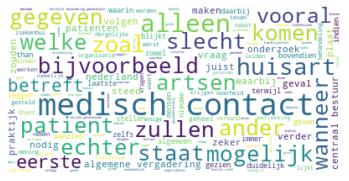

In [11]:
plt.imshow(text_cloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig('/Users/huijn001/Desktop/got.png', dpi=300, bbox_inches='tight') # To save word cloud to your computer
plt.show()

#### Add user defined stop words based on the Counter output

N.B. If you want to rerun Counter, make sure to use all_texts_list_clean instead of all_texts_list!

In [ ]:
def remove_user_defined_stopword_list(words):
    """ Given a hardcoded list of words and stop words, remove stop words """
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

In [ ]:
all_texts_list_clean = remove_user_defined_stopword_list(all_texts_list)

### Word counts

In [12]:
word_counts = Counter(all_texts_list)

In [13]:
most_common_words = word_counts.most_common(100)

In [14]:
print('Most common words:')
for word, count in most_common_words:
    print('%s: %7d' % (word, count))

Most common words:
medisch:   87730
medische:   80183
moeten:   75890
artsen:   74315
huisarts:   73765
patient:   72328
aantal:   64603
contact:   61900
onderzoek:   60810
gezondheidszorg:   60348
tussen:   58286
commissie:   55874
huisartsen:   54564
eerste:   53825
komen:   47651
ziekenhuis:   46773
mogelijk:   44989
alleen:   42724
maatschappij:   42507
zoals:   41555
specialisten:   41386
echter:   40923
behandeling:   40652
welke:   40284
eigen:   39830
algemene:   39549
plaats:   38534
nieuwe:   38503
maken:   38190
geneeskunde:   38015
grote:   37950
bestuur:   37945
amsterdam:   37775
zullen:   37580
vraag:   35525
voorzitter:   34870
geven:   34743
opleiding:   34525
patienten:   34483
leden:   33377
binnen:   32937
utrecht:   32928
vergadering:   32349
sociale:   31982
artikel:   31359
prof:   31285
vereniging:   31248
centraal:   30511
wanneer:   30320
waarin:   29987
ziekenhuizen:   29839
staat:   28947
wijze:   28704
steeds:   28434
dient:   28356
enkele:   28175
stellen:

#### Visualize word counts in all texts in a bar chart

In [ ]:
#### From https://stackoverflow.com/questions/63018726/counter-and-plot-the-most-common-word-in-a-text ####

y = [count for word, count in most_common_words]
x = [word for word, count in most_common_words]

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x, y, color='crimson')
plt.title("Term frequencies in text")
plt.ylabel("Counts")
#plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=45)
for i, (word, count) in enumerate(most_common_words):
    plt.text(i, count, f' {count} ', rotation=45,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

## Part-of-speech tags with Spacy

In [ ]:
# Initialize spacy 'nl' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser']) ### disable=['parser', 'ner'] om nog sneller te zijn

In [ ]:
doc = nlp(all_texts_string)
n = 100

# all tokens that arent stop words or punctuations
words = [token.text
    for token in doc
    if not token.is_stop and not token.is_punct]

# noun tokens that arent stop words or punctuations
nouns = [token.text
    for token in doc
    if (not token.is_stop and
        not token.is_punct and
        token.pos_ == "NOUN")]

# verb tokens that arent stop words or punctuations
verbs = [token.text
    for token in doc
    if (not token.is_stop and
        not token.is_punct and
        token.pos_ == "VERB")]

# pnoun tokens that arent stop words or punctuations
pnouns = [token.text
    for token in doc
    if (not token.is_stop and
        not token.is_punct and
        token.pos_ == "PROPN")]

# adj tokens that arent stop words or punctuations
adjs = [token.text
     for token in doc
     if (not token.is_stop and
         not token.is_punct and
         token.pos_ == "ADJ")]

# five most common noun tokens
noun_freq = Counter(nouns)
common_nouns = noun_freq.most_common(n)
print('These are the ' + str(n) + ' most common nouns:')
print(common_nouns)
print('\n')

# five most common verb tokens
verbs_freq = Counter(verbs)
common_verbs = verbs_freq.most_common(n)
print('These are the ' + str(n) + ' most common verbs:')
print(common_verbs)
print('\n')

# five most common noun tokens
pnoun_freq = Counter(pnouns)
common_pnouns = pnoun_freq.most_common(n)
print('These are the ' + str(n) + ' most common proper nouns:')
print(common_pnouns)
print('\n')

# five most common adj tokens
adj_freq = Counter(adjs)
common_adjs = adj_freq.most_common(n)
print('These are the ' + str(n) + ' most common adjectives:')
print(common_adjs)
print('\n')

#print('These are all Named Entities:')
#for ent in doc.ents:
#    print(ent.text,  ent.label_)